# Importing Library

In [1]:
# Importing Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os
import itertools

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Check library version
print("---Library version---", end = '\n\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---

pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning\Python For Machine Learning (Book)\Supervised Learning\Linear Regression
List Directory: ['.ipynb_checkpoints', 'Walmart_sales.ipynb']


# Importing Data

In [2]:
data = pd.read_csv(filepath_or_buffer = r"C:\Users\theer\Desktop\Machine Learning\Data\Walmart_sales.csv")
with pd.option_context('display.max_rows', 9999):
    display(data.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
print(f'Sample: {data.shape[0]} record, Feature: {data.shape[1]}')

Sample: 6435 record, Feature: 8


# Overview Data

In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Data Preparation

In [7]:
# Drop not use columns
data = data.drop(columns = ['Store', 'Date', 'Holiday_Flag'])
data

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684
6431,733455.07,64.89,3.985,192.170412,8.667
6432,734464.36,54.47,4.000,192.327265,8.667
6433,718125.53,56.47,3.969,192.330854,8.667


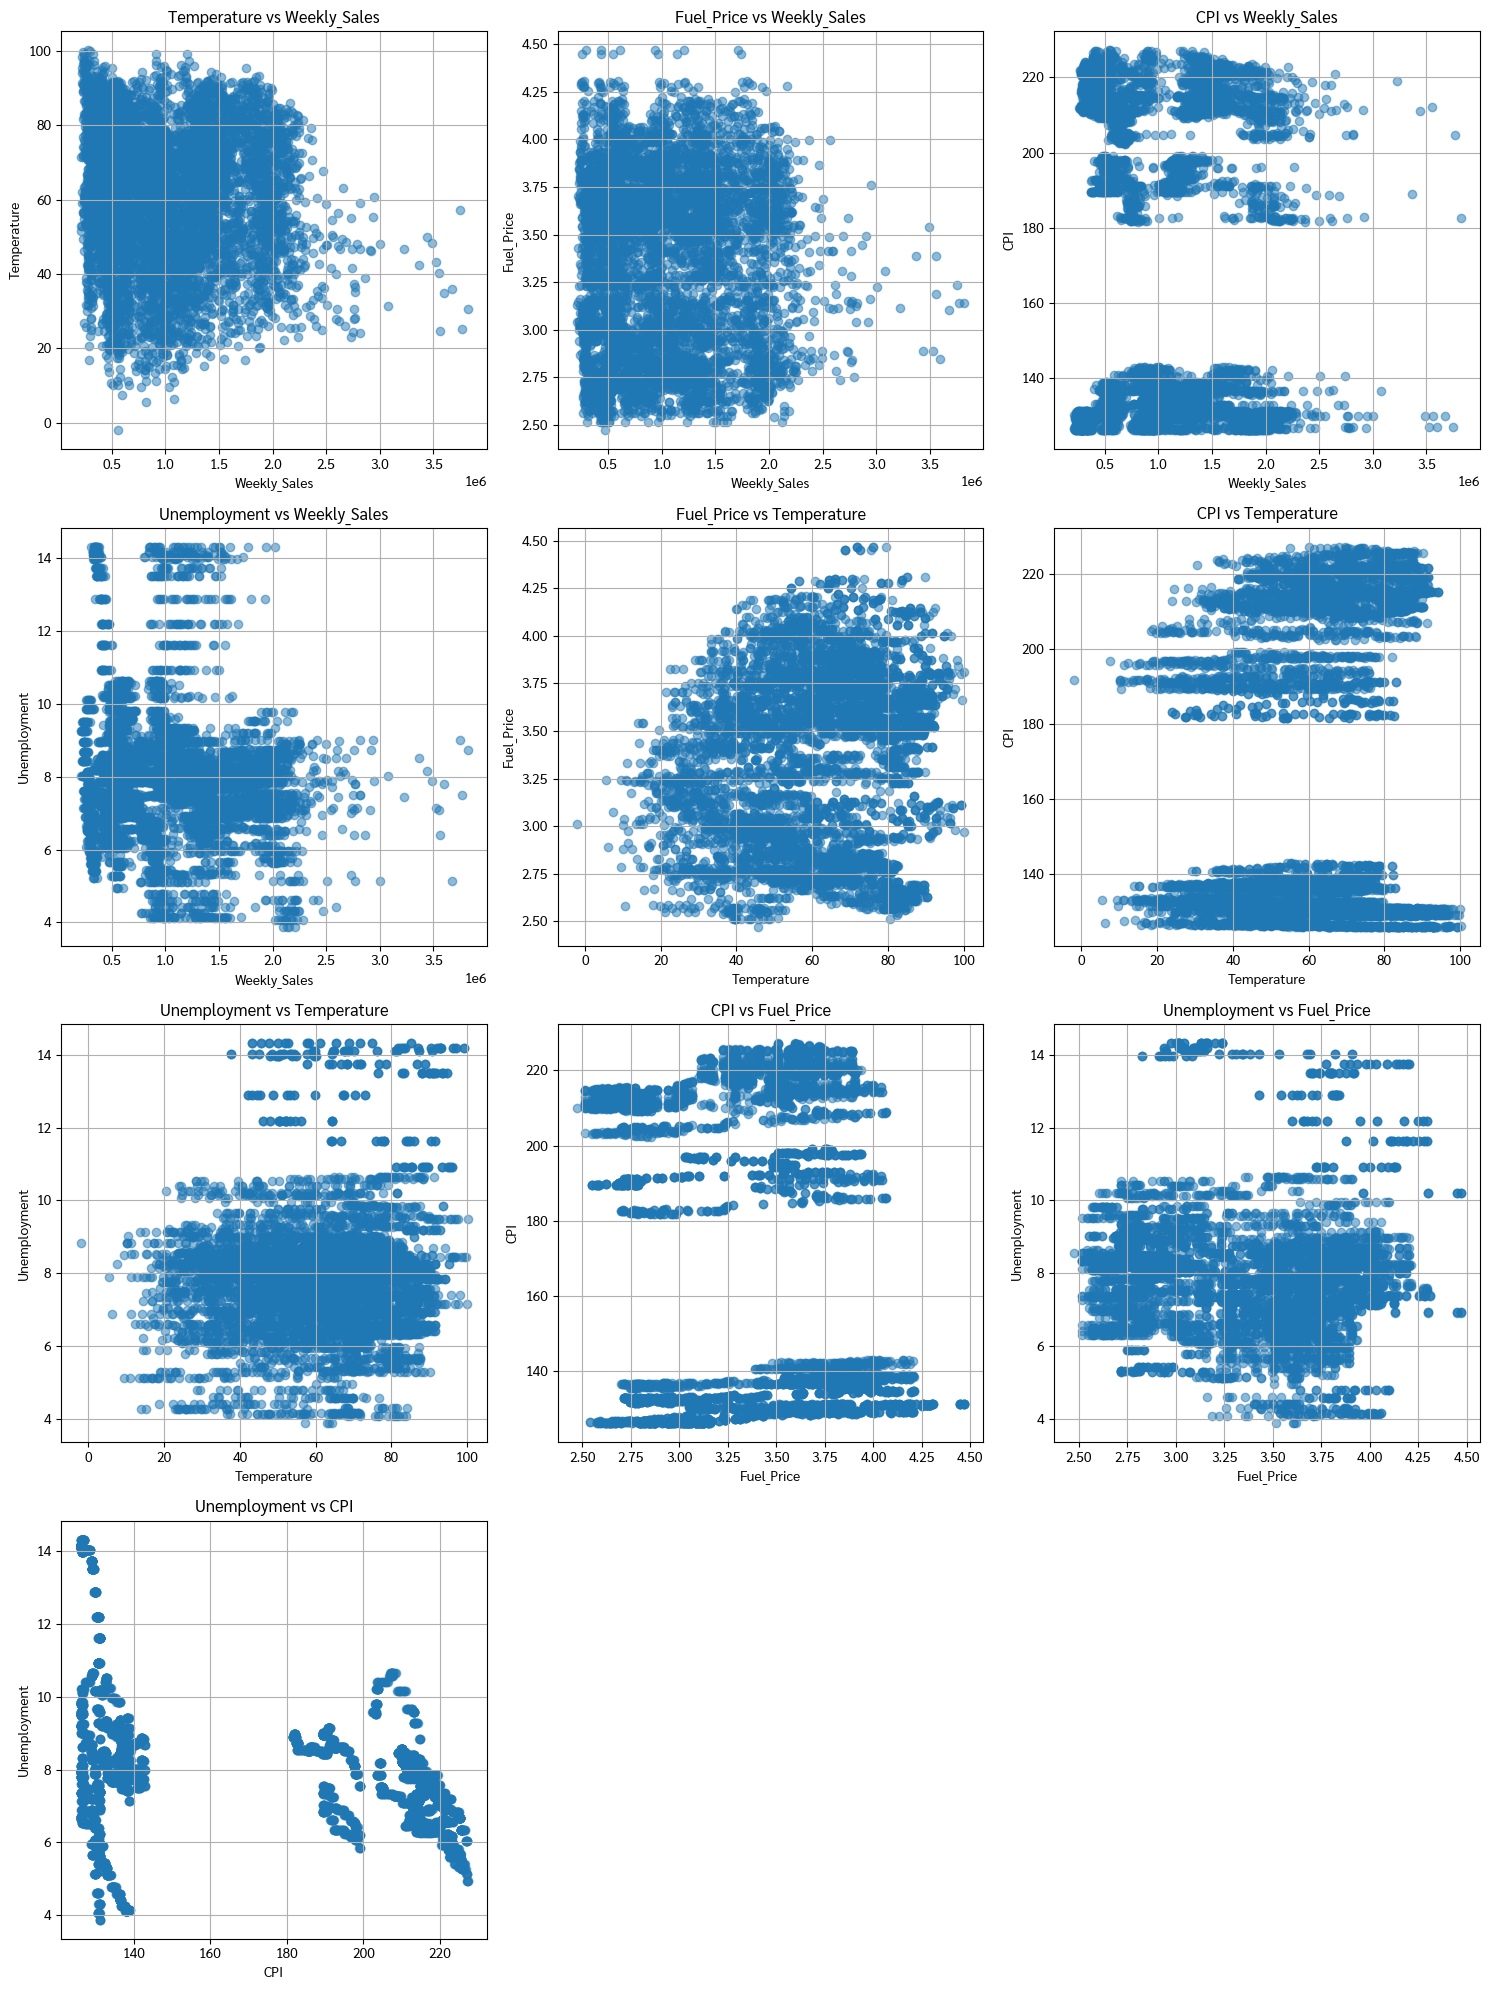

In [8]:
# Generate all possible combinations of scatter plots
combinations = list(itertools.combinations(data.columns, 2))

# Determine number of rows and columns for subplot layout
num_plots = len(combinations)
num_cols = 3  # Number of columns in subplot layout
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure all plots are accommodated

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()  # Flatten axes to handle both 1D and 2D cases

# Plot each combination
for i, combination in enumerate(combinations):
    x_column, y_column = combination
    ax = axes[i]  # Select current subplot
    ax.scatter(data[x_column], data[y_column], alpha=0.5)
    ax.set_title(f'{y_column} vs {x_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

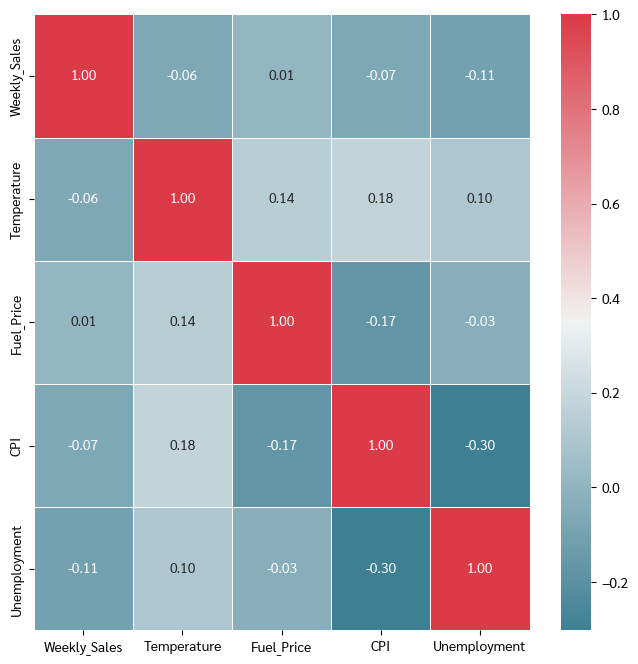

In [9]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f")
plt.show()

# Model Development

# Model Evaluation